In [1]:
import requests
from bs4 import BeautifulSoup
import bs4
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from io import BytesIO
import re
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g
import datetime
from selenium.webdriver.chrome.options import Options
import numpy as np
import random
from selenium.webdriver import ActionChains
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("../creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("stock data")
sheet = sheet.worksheet("crypto")
df = pd.DataFrame(sheet.get_all_values())
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df.replace('N/A', np.nan)
df= df.dropna()

In [3]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("../creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("stock data1")
sheet = sheet.worksheet("crypto")
df1 = pd.DataFrame(sheet.get_all_values())
df1.columns = df1.iloc[0]
df1 = df1.iloc[1:]
df1 = df1.replace('N/A', np.nan)
df1= df1.dropna()


In [4]:
allData = df.append(df1)
allData

,Symbol,Name,Price (Intraday),Change,% Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time
1,BTC-USD,Bitcoin USD,"19,150.53",+103.47,+0.54%,355.508B,23.548B,23.548B,23.548B,18.564M,Sun Dec 6 12:04:29 2020
2,ETH-USD,Ethereum USD,595.91,+6.78,+1.15%,67.769B,10.403B,10.403B,10.403B,113.724M,Sun Dec 6 12:04:29 2020
3,XRP-USD,XRP USD,0.6076,+0.0044,+0.73%,27.547B,9.583B,9.583B,9.583B,45.334B,Sun Dec 6 12:04:29 2020
4,USDT-USD,Tether USD,1.0011,+0.0007,+0.07%,19.682B,39.491B,39.491B,39.491B,19.66B,Sun Dec 6 12:04:29 2020
5,LTC-USD,Litecoin USD,82.46,-2.08,-2.46%,5.445B,3.353B,3.353B,3.353B,66.029M,Sun Dec 6 12:04:29 2020
...,...,...,...,...,...,...,...,...,...,...,...
21017,DASH-USD,Dash USD,64.57,-1.69,-2.56%,598.286M,456.38M,456.38M,456.38M,9.265M,Sun Jan 12 22:30:04 2020
21018,MIOTA-USD,IOTA USD,0.1895,-0.0017,-0.91%,526.801M,4.303M,4.303M,4.303M,2.78B,Sun Jan 12 22:30:04 2020
21019,VET-USD,VeChain USD,0.0055,-0.0000,-0.82%,303.171M,92.798M,92.798M,92.798M,55.455B,Sun Jan 12 22:30:04 2020
21020,XEM-USD,NEM USD,0.0335,-0.0000,-0.00%,301.107M,3.467M,3.467M,3.467M,9B,Sun Jan 12 22:30:04 2020


In [5]:
allData = allData.reset_index()
allData

,index,Symbol,Name,Price (Intraday),Change,% Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time
0,1,BTC-USD,Bitcoin USD,"19,150.53",+103.47,+0.54%,355.508B,23.548B,23.548B,23.548B,18.564M,Sun Dec 6 12:04:29 2020
1,2,ETH-USD,Ethereum USD,595.91,+6.78,+1.15%,67.769B,10.403B,10.403B,10.403B,113.724M,Sun Dec 6 12:04:29 2020
2,3,XRP-USD,XRP USD,0.6076,+0.0044,+0.73%,27.547B,9.583B,9.583B,9.583B,45.334B,Sun Dec 6 12:04:29 2020
3,4,USDT-USD,Tether USD,1.0011,+0.0007,+0.07%,19.682B,39.491B,39.491B,39.491B,19.66B,Sun Dec 6 12:04:29 2020
4,5,LTC-USD,Litecoin USD,82.46,-2.08,-2.46%,5.445B,3.353B,3.353B,3.353B,66.029M,Sun Dec 6 12:04:29 2020
...,...,...,...,...,...,...,...,...,...,...,...,...
25434,21017,DASH-USD,Dash USD,64.57,-1.69,-2.56%,598.286M,456.38M,456.38M,456.38M,9.265M,Sun Jan 12 22:30:04 2020
25435,21018,MIOTA-USD,IOTA USD,0.1895,-0.0017,-0.91%,526.801M,4.303M,4.303M,4.303M,2.78B,Sun Jan 12 22:30:04 2020
25436,21019,VET-USD,VeChain USD,0.0055,-0.0000,-0.82%,303.171M,92.798M,92.798M,92.798M,55.455B,Sun Jan 12 22:30:04 2020
25437,21020,XEM-USD,NEM USD,0.0335,-0.0000,-0.00%,301.107M,3.467M,3.467M,3.467M,9B,Sun Jan 12 22:30:04 2020


In [6]:
allData = allData.drop(columns = ['index'])
allData

,Symbol,Name,Price (Intraday),Change,% Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time
0,BTC-USD,Bitcoin USD,"19,150.53",+103.47,+0.54%,355.508B,23.548B,23.548B,23.548B,18.564M,Sun Dec 6 12:04:29 2020
1,ETH-USD,Ethereum USD,595.91,+6.78,+1.15%,67.769B,10.403B,10.403B,10.403B,113.724M,Sun Dec 6 12:04:29 2020
2,XRP-USD,XRP USD,0.6076,+0.0044,+0.73%,27.547B,9.583B,9.583B,9.583B,45.334B,Sun Dec 6 12:04:29 2020
3,USDT-USD,Tether USD,1.0011,+0.0007,+0.07%,19.682B,39.491B,39.491B,39.491B,19.66B,Sun Dec 6 12:04:29 2020
4,LTC-USD,Litecoin USD,82.46,-2.08,-2.46%,5.445B,3.353B,3.353B,3.353B,66.029M,Sun Dec 6 12:04:29 2020
...,...,...,...,...,...,...,...,...,...,...,...
25434,DASH-USD,Dash USD,64.57,-1.69,-2.56%,598.286M,456.38M,456.38M,456.38M,9.265M,Sun Jan 12 22:30:04 2020
25435,MIOTA-USD,IOTA USD,0.1895,-0.0017,-0.91%,526.801M,4.303M,4.303M,4.303M,2.78B,Sun Jan 12 22:30:04 2020
25436,VET-USD,VeChain USD,0.0055,-0.0000,-0.82%,303.171M,92.798M,92.798M,92.798M,55.455B,Sun Jan 12 22:30:04 2020
25437,XEM-USD,NEM USD,0.0335,-0.0000,-0.00%,301.107M,3.467M,3.467M,3.467M,9B,Sun Jan 12 22:30:04 2020


In [7]:
# allData.to_csv('../crypto.csv',encoding='utf-8', index=False)

In [8]:
df = allData

In [9]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if "," in x:
        x = x.replace(',', '')
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'T' in x:
        if len(x) > 1:
            return float(x.replace('T', '')) * 1000000000
        return 1000000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return float(x)

In [10]:
df["Total Volume All Currencies (24Hr)"] = [value_to_float(x) for x in df["Total Volume All Currencies (24Hr)"]]
df["Volume in Currency (Since 0:00 UTC)"] = [value_to_float(x) for x in df["Volume in Currency (Since 0:00 UTC)"]]
df["Volume in Currency (24Hr)"] = [value_to_float(x) for x in df["Volume in Currency (24Hr)"]]
df['Circulating Supply'] = [value_to_float(x) for x in df['Circulating Supply']]
df['52 Week Range'] = [value_to_float(x) for x in df['52 Week Range']]

In [11]:
df['Change'] = [s.replace(',', '').replace('+', '') for s in df['Change']]
df["Price (Intraday)"] = [s.replace(',', '') for s in df["Price (Intraday)"]]

In [12]:
df['time'] = [datetime.datetime.strptime(s[4:], '%b %d %H:%M:%S %Y') for s in df['time']]

In [13]:
rbh = ['BSV-USD','BTC-USD', 'BCH-USD','LTC-USD','ETH-USD']

In [14]:
df = df.astype({'Change': float, "Price (Intraday)": float, "Total Volume All Currencies (24Hr)": float, "Volume in Currency (Since 0:00 UTC)": float, "Volume in Currency (24Hr)": float, 'Circulating Supply':float,'52 Week Range': float})

In [15]:
df = df.drop(columns = '% Change')

In [16]:
list(df['time'])[0].hour

12

In [17]:
df['day of week'] = [t.weekday() for t in df['time']]
df

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week
0,BTC-USD,Bitcoin USD,19150.5300,103.4700,3.555080e+11,2.354800e+10,2.354800e+10,2.354800e+10,1.856400e+07,2020-12-06 12:04:29,6
1,ETH-USD,Ethereum USD,595.9100,6.7800,6.776900e+10,1.040300e+10,1.040300e+10,1.040300e+10,1.137240e+08,2020-12-06 12:04:29,6
2,XRP-USD,XRP USD,0.6076,0.0044,2.754700e+10,9.583000e+09,9.583000e+09,9.583000e+09,4.533400e+10,2020-12-06 12:04:29,6
3,USDT-USD,Tether USD,1.0011,0.0007,1.968200e+10,3.949100e+10,3.949100e+10,3.949100e+10,1.966000e+10,2020-12-06 12:04:29,6
4,LTC-USD,Litecoin USD,82.4600,-2.0800,5.445000e+09,3.353000e+09,3.353000e+09,3.353000e+09,6.602900e+07,2020-12-06 12:04:29,6
...,...,...,...,...,...,...,...,...,...,...,...
25434,DASH-USD,Dash USD,64.5700,-1.6900,5.982860e+08,4.563800e+08,4.563800e+08,4.563800e+08,9.265000e+06,2020-01-12 22:30:04,6
25435,MIOTA-USD,IOTA USD,0.1895,-0.0017,5.268010e+08,4.303000e+06,4.303000e+06,4.303000e+06,2.780000e+09,2020-01-12 22:30:04,6
25436,VET-USD,VeChain USD,0.0055,-0.0000,3.031710e+08,9.279800e+07,9.279800e+07,9.279800e+07,5.545500e+10,2020-01-12 22:30:04,6
25437,XEM-USD,NEM USD,0.0335,-0.0000,3.011070e+08,3.467000e+06,3.467000e+06,3.467000e+06,9.000000e+09,2020-01-12 22:30:04,6


In [18]:
df['hour of day'] = [t.hour for t in df['time']]
df

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day
0,BTC-USD,Bitcoin USD,19150.5300,103.4700,3.555080e+11,2.354800e+10,2.354800e+10,2.354800e+10,1.856400e+07,2020-12-06 12:04:29,6,12
1,ETH-USD,Ethereum USD,595.9100,6.7800,6.776900e+10,1.040300e+10,1.040300e+10,1.040300e+10,1.137240e+08,2020-12-06 12:04:29,6,12
2,XRP-USD,XRP USD,0.6076,0.0044,2.754700e+10,9.583000e+09,9.583000e+09,9.583000e+09,4.533400e+10,2020-12-06 12:04:29,6,12
3,USDT-USD,Tether USD,1.0011,0.0007,1.968200e+10,3.949100e+10,3.949100e+10,3.949100e+10,1.966000e+10,2020-12-06 12:04:29,6,12
4,LTC-USD,Litecoin USD,82.4600,-2.0800,5.445000e+09,3.353000e+09,3.353000e+09,3.353000e+09,6.602900e+07,2020-12-06 12:04:29,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...
25434,DASH-USD,Dash USD,64.5700,-1.6900,5.982860e+08,4.563800e+08,4.563800e+08,4.563800e+08,9.265000e+06,2020-01-12 22:30:04,6,22
25435,MIOTA-USD,IOTA USD,0.1895,-0.0017,5.268010e+08,4.303000e+06,4.303000e+06,4.303000e+06,2.780000e+09,2020-01-12 22:30:04,6,22
25436,VET-USD,VeChain USD,0.0055,-0.0000,3.031710e+08,9.279800e+07,9.279800e+07,9.279800e+07,5.545500e+10,2020-01-12 22:30:04,6,22
25437,XEM-USD,NEM USD,0.0335,-0.0000,3.011070e+08,3.467000e+06,3.467000e+06,3.467000e+06,9.000000e+09,2020-01-12 22:30:04,6,22


In [19]:
df = df[df['hour of day'] != 22]
df

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day
0,BTC-USD,Bitcoin USD,19150.5300,103.4700,3.555080e+11,2.354800e+10,2.354800e+10,2.354800e+10,1.856400e+07,2020-12-06 12:04:29,6,12
1,ETH-USD,Ethereum USD,595.9100,6.7800,6.776900e+10,1.040300e+10,1.040300e+10,1.040300e+10,1.137240e+08,2020-12-06 12:04:29,6,12
2,XRP-USD,XRP USD,0.6076,0.0044,2.754700e+10,9.583000e+09,9.583000e+09,9.583000e+09,4.533400e+10,2020-12-06 12:04:29,6,12
3,USDT-USD,Tether USD,1.0011,0.0007,1.968200e+10,3.949100e+10,3.949100e+10,3.949100e+10,1.966000e+10,2020-12-06 12:04:29,6,12
4,LTC-USD,Litecoin USD,82.4600,-2.0800,5.445000e+09,3.353000e+09,3.353000e+09,3.353000e+09,6.602900e+07,2020-12-06 12:04:29,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...
25414,DASH-USD,Dash USD,64.8100,-1.4600,6.004830e+08,4.528090e+08,4.528090e+08,4.528090e+08,9.265000e+06,2020-01-13 00:00:08,0,0
25415,MIOTA-USD,IOTA USD,0.1885,-0.0028,5.239890e+08,4.328000e+06,4.328000e+06,4.328000e+06,2.780000e+09,2020-01-13 00:00:08,0,0
25416,VET-USD,VeChain USD,0.0055,-0.0001,3.027000e+08,9.091300e+07,9.091300e+07,9.091300e+07,5.545500e+10,2020-01-13 00:00:08,0,0
25417,XEM-USD,NEM USD,0.0334,-0.0001,3.003970e+08,3.457000e+06,3.457000e+06,3.457000e+06,9.000000e+09,2020-01-13 00:00:08,0,0


In [20]:
df['timedelta'] = [(datetime.datetime.now() - x).total_seconds() for x in df['time']]

/Users/johnschulz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df['6 hour diff'] = df.groupby('Symbol')['Price (Intraday)'].diff() * -1

/Users/johnschulz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df['% 6 hour diff'] = df['6 hour diff']/ (df['Price (Intraday)'] - df['6 hour diff']) * 100

/Users/johnschulz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
eth = df[df['Symbol'] == 'ETH-USD']
eth

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day,timedelta,6 hour diff,% 6 hour diff
1,ETH-USD,Ethereum USD,595.91,6.78,6.776900e+10,1.040300e+10,1.040300e+10,1.040300e+10,113724000.0,2020-12-06 12:04:29,6,12,1.131457e+04,NaN,NaN
21,ETH-USD,Ethereum USD,587.80,-10.88,6.684500e+10,1.291200e+10,1.291200e+10,1.291200e+10,113720000.0,2020-12-06 06:04:27,6,6,3.291658e+04,8.11,1.399024
41,ETH-USD,Ethereum USD,600.47,2.61,6.828300e+10,1.298200e+10,1.298200e+10,1.298200e+10,113717000.0,2020-12-06 00:00:04,6,0,5.477958e+04,-12.67,-2.066412
61,ETH-USD,Ethereum USD,604.08,0.26,6.869200e+10,1.340600e+10,1.340600e+10,1.340600e+10,113714000.0,2020-12-05 18:00:04,5,18,7.637958e+04,-3.61,-0.594053
81,ETH-USD,Ethereum USD,594.38,7.21,6.758700e+10,1.443800e+10,1.443800e+10,1.443800e+10,113710000.0,2020-12-05 12:00:04,5,12,9.797958e+04,9.70,1.659027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25320,ETH-USD,Ethereum USD,149.64,5.51,1.635100e+10,9.933000e+09,9.933000e+09,9.933000e+09,109271000.0,2020-01-14 00:00:06,1,0,2.830758e+07,3.78,2.591526
25340,ETH-USD,Ethereum USD,147.27,3.13,1.609200e+10,9.062000e+09,9.062000e+09,9.062000e+09,109267000.0,2020-01-13 18:00:05,0,18,2.832918e+07,2.37,1.635611
25360,ETH-USD,Ethereum USD,143.94,-2.85,1.572700e+10,8.288000e+09,8.288000e+09,8.288000e+09,109264000.0,2020-01-13 12:00:06,0,12,2.835078e+07,3.33,2.368253
25380,ETH-USD,Ethereum USD,143.64,-3.15,1.569400e+10,8.460000e+09,8.460000e+09,8.460000e+09,109261000.0,2020-01-13 06:00:06,0,6,2.837238e+07,0.30,0.209293


In [33]:
def linRegression(data, test_size, train_size):
    data = data.drop(columns = 'time')
    test = data.drop(columns = ['Name', 'Symbol'])
    test = test.dropna()
    X = test.drop(columns = ['% 6 hour diff', '6 hour diff'])
    y = test['% 6 hour diff']
    scaler = StandardScaler() 
    X = scaler.fit_transform(X)
    
    X_train = X[test_size:test_size + train_size]
    X_test = X[:test_size]

    
    y_train = y[test_size:test_size + train_size]
    y_test = y[:test_size]
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return X_train, y_train, y_pred, y_test, data['timedelta']

In [34]:
def linRegressionProj(data, test_size, train_size):
    data = data.drop(columns = 'time')
    test = data.drop(columns = ['Name', 'Symbol'])
#     test = test.dropna()
    X = test.drop(columns = ['% 6 hour diff', '6 hour diff'])
    y = test['% 6 hour diff']
    scaler = StandardScaler() 
    X = scaler.fit_transform(X)
    
    X_train = X[test_size:test_size + train_size]
    X_test = X[:test_size]

    
    y_train = y[test_size:test_size + train_size]
    y_test = y[:test_size]
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred, y_test

In [69]:
test_size = 20
train_size = 20
x_train, y_train, y_pred, y_test, timedeltas = linRegression(eth, test_size,train_size)

In [71]:
eth.head(5)

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day,timedelta,6 hour diff,% 6 hour diff
1,ETH-USD,Ethereum USD,595.91,6.78,6.776900e+10,1.040300e+10,1.040300e+10,1.040300e+10,113724000.0,2020-12-06 12:04:29,6,12,11314.574866,NaN,NaN
21,ETH-USD,Ethereum USD,587.80,-10.88,6.684500e+10,1.291200e+10,1.291200e+10,1.291200e+10,113720000.0,2020-12-06 06:04:27,6,6,32916.575205,8.11,1.399024
41,ETH-USD,Ethereum USD,600.47,2.61,6.828300e+10,1.298200e+10,1.298200e+10,1.298200e+10,113717000.0,2020-12-06 00:00:04,6,0,54779.575528,-12.67,-2.066412
61,ETH-USD,Ethereum USD,604.08,0.26,6.869200e+10,1.340600e+10,1.340600e+10,1.340600e+10,113714000.0,2020-12-05 18:00:04,5,18,76379.575853,-3.61,-0.594053
81,ETH-USD,Ethereum USD,594.38,7.21,6.758700e+10,1.443800e+10,1.443800e+10,1.443800e+10,113710000.0,2020-12-05 12:00:04,5,12,97979.576177,9.70,1.659027


(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 <a list of 7 Text xticklabel objects>)

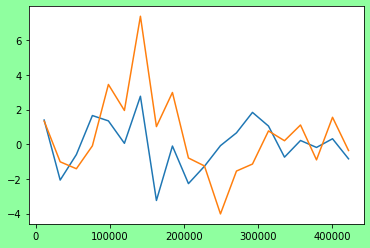

In [72]:
fig = plt.figure()
# plt.plot(list(timedeltas)[test_size:train_size + test_size], y_train)
plt.plot(list(timedeltas)[:test_size], y_test)
plt.plot(list(timedeltas)[:test_size], y_pred)
fig.patch.set_facecolor('xkcd:mint green')
plt.xticks()

In [ ]:
linRegression(data, test_size, train_size)

In [30]:
minR2 = 0
ind = 0
xx = 0
data = eth
tests = pd.DataFrame(columns=["test size", "train size", "average accuracy"])
for x in range(1, 350):
    print(x)
    for i in range(1, 150):
        avgr2 = 0
        p1 = []
        t1 = []
        for y in range(1, 100):
            test = data.iloc[y:]
            p, t = linRegression(test, i, x)
            p1.append(p[0])
            t1.append(t.iloc[0])
        avgr2 = metrics.r2_score(t1,p1)
        tests = tests.append({"test size": i,
                        "train size": x,
                        "average accuracy": avgr2}, ignore_index=True)
        if minR2 < avgr2 and avgr2 < 1:
            minR2 = avgr2
            ind = i
            xx = x
            ts = t1
            ps = p1          
ind

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


KeyboardInterrupt: 

In [ ]:
temp = tests
temp

In [ ]:
tests = tests.sort_values('average accuracy', ascending = False).head(40)
guesses = []
for i in range(40):
    p, t = linRegressionProj(eth, int(list(tests['test size'])[i]), int(list(tests['train size'])[i]))
    predsProj = pd.DataFrame({'y_pred':p, 'y_test':t})
    guess = list(predsProj['y_pred'])[0]
    guesses.append(guess)
tests['guess'] = guesses  
tests

In [401]:
minR2 = 0
ind = 0
xx = 0
data = eth
tests = pd.DataFrame(columns=["test size", "train size", "average accuracy"])
for x in range(110, 150):
    print(x)
    for i in range(1, 20):
        avgr2 = 0
        p1 = []
        t1 = []
        for y in range(1, 10):
            test = data.iloc[y:]
            p, t = linRegression(test, i, x)
            p1.append(p[0])
            t1.append(t.iloc[0])
        avgr2 = metrics.r2_score(t1,p1)
        tests = tests.append({"test size": i,
                        "train size": x,
                        "average accuracy": avgr2}, ignore_index=True)
        if minR2 < avgr2 and avgr2 < 1:
            minR2 = avgr2
            ind = i
            xx = x
            ts = t1
            ps = p1          
ind

110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


11

In [402]:
tests = tests.sort_values('average accuracy', ascending = False).head(40)
guesses = []
for i in range(40):
    p, t = linRegressionProj(eth, int(list(tests['test size'])[i]), int(list(tests['train size'])[i]))
    predsProj = pd.DataFrame({'y_pred':p, 'y_test':t})
    guess = list(predsProj['y_pred'])[0]
    guesses.append(guess)
tests['guess'] = guesses  
tests

,test size,train size,average accuracy,guess
751,11.0,149.0,0.283477,0.392909
466,11.0,134.0,0.238149,0.308707
749,9.0,149.0,0.235263,0.085501
124,11.0,116.0,0.215161,0.592449
143,11.0,117.0,0.210560,0.505220
29,11.0,111.0,0.210126,0.704204
10,11.0,110.0,0.210071,0.820924
86,11.0,114.0,0.209909,0.524339
141,9.0,117.0,0.190621,-0.025797
105,11.0,115.0,0.177938,0.376944


In [403]:
guesses = []
for i in range(40):
    p, t = linRegressionProj(eth, int(list(tests['test size'])[i]), int(list(tests['train size'])[i]))
    predsProj = pd.DataFrame({'y_pred':p, 'y_test':t})
    guess = list(predsProj['y_pred'])[0]
    guesses.append(guess)
tests['guess'] = guesses  
tests

,test size,train size,average accuracy,guess
751,11.0,149.0,0.283477,0.392909
466,11.0,134.0,0.238149,0.308707
749,9.0,149.0,0.235263,0.085501
124,11.0,116.0,0.215161,0.592449
143,11.0,117.0,0.210560,0.505220
29,11.0,111.0,0.210126,0.704204
10,11.0,110.0,0.210071,0.820924
86,11.0,114.0,0.209909,0.524339
141,9.0,117.0,0.190621,-0.025797
105,11.0,115.0,0.177938,0.376944


In [405]:
predss = pd.DataFrame({'y_pred':ps, 'y_test':ts})
predss

,y_pred,y_test
0,0.804619,0.660426
1,0.977570,1.841805
2,0.191758,1.052003
3,0.002929,-0.743006
4,0.770992,0.218656
5,0.795655,-0.182268
6,0.053931,0.318638
7,-0.248555,-0.839392
8,0.367393,1.480630


In [406]:
p, t = linRegressionProj(eth, ind, xx)

In [407]:
# p1.append(p[0])
p[0]

0.3929091094483823

In [408]:
predsProj = pd.DataFrame({'y_pred':p, 'y_test':t})
predsProj

,y_pred,y_test
1,0.392909,NaN
21,0.733878,0.660426
41,0.985786,1.841805
61,0.322114,1.052003
81,0.439257,-0.743006
101,0.887318,0.218656
121,1.293254,-0.182268
141,0.489195,0.318638
161,0.447238,-0.839392
181,0.780880,1.480630


In [412]:
p, t = linRegression(df, ind, xx)


In [ ]:
allResults = pd.DataFrame()
# for q in range(2, 15):
p, t = linRegressionProj(df, ind, xx)
results = df.iloc[:15]
results['bins'] = [q] * 15
results['guess'] = p[:15]
maxProjs = []
maxVals = []
for i in range(len(results['guess'])):
    guess = results['guess'][i]
    currVal = results['Price (Intraday)'][i]
    if guess == 0:
        maxP = 'x < ' + str(qs[guess]) 
        maxVal = 'x < ' + str(qs[guess]/100 * currVal + currVal) 
    elif guess == q - 1:
        maxP =  str(qs[guess -1]) + ' < x'
        maxVal= str(qs[guess -1]/100 * currVal + currVal) + ' < x'
    else:
        maxP = str(qs[guess - 1]) + ' < ' + ' x ' + ' < ' + str(qs[guess])
        maxVal = str(qs[guess - 1]/100 * currVal + currVal) + ' < ' + ' x ' + ' < ' + str(qs[guess]/ 100 * currVal + currVal)
    maxVals.append(maxVal)
    maxProjs.append(maxP)
results['max value'] = maxVals
results['max %'] = maxProjs
allResults = allResults.append(results[['Symbol','Name','Price (Intraday)','bins', 'guess', 'max %','max value']])
allResults

In [419]:
xx

149

In [418]:
ind

11

In [ ]:
(data, test_size, train_size)

In [451]:
for i in range(1,400):
    print(i)
    p, t = linRegression(df, 40, i)
    print(metrics.r2_score(t,p))


1
-0.22661489693422832
2
-0.38439938875192947
3
-0.26303773007252085
4
-0.400141814374384
5
-0.24647874040234763
6
-920.1790852367974
7
-6478934052574840.0
8
-1.479991121217846e+18
9
-9.4140418899574e+16
10
-2.2353204839577341e+18
11
-4.177809775544327e+17
12
-1.1737758424216429e+17
13
-3.418086705339432e+16
14
-611777701429600.2
15
-297896549489048.1
16
-3350376614202627.0
17
-1.5907803967338035e+17
18
-7.170233991167817e+16
19
-2.9776410374384788e+16
20
-2.558247250999981e+16
21
-1.6371902947658957e+17
22
-9.713743148930493e+16
23
-4.844104287773052e+16
24
-5.584589615385691e+16
25
-4.685842700303541e+16
26
-6.36400534257986e+16
27
-6.0114749323691544e+16
28
-6.007895569836891e+16
29
-4.37753239919157e+16
30
-4.64974680062249e+16
31
-4.637398083284977e+16
32
-2.9102162943041332e+16
33
-4.313113137514038e+16
34
-5.778854258497639e+16
35
-6.183993330653963e+16
36
-6.2336641375145784e+16
37
-7.6705347815479e+16
38
-4.158620563493203e+17
39
-3.326292401183069e+17
40
-2.1964045278121024e+

-2.7593426134885966
350
-2.7207132642407448
351
-2.6635780892842376
352
-2.602877977950428
353
-2.525902851335492
354
-2.3890899576700098
355
-2.314084674538929
356
-2.217378194835277
357
-2.098640120624446
358
-1.982008354701028
359
-1.960158369662964
360
-1.8342512482646005
361
-1.8717418369131713
362
-1.9070623822957216
363
-2.059407662910412
364
-2.0521382328015694
365
-2.0238489782474165
366
-2.0765489610870094
367
-2.0987777898457596
368
-2.154093656472206
369
-2.0707075524787886
370
-2.061290571114366
371
-2.068890760548316
372
-2.1264043455000303
373
-2.128258012137658
374
-2.15015248000231
375
-2.1381388948357563
376
-2.1611289055815033
377
-2.1548894150728213
378
-2.141218025175317
379
-2.1316753032772824
380
-2.1557305237397366
381
-2.1709953615707183
382
-2.179167813380746
383
-2.1994484247415143
384
-2.198488966886098
385
-2.215667307115154
386
-2.2314393638639745
387
-2.256463344585899
388
-2.269231664538136
389
-2.3956585785147015
390
-2.4168934498703774
391
-2.410542504

In [452]:
p, t = linRegression(df, 40, 123)
p

array([0.40426736, 0.63189342, 0.63298191, 0.50721799, 0.60382008,
       0.61895021, 0.61405803, 0.62571757, 0.62030074, 0.6203091 ,
       0.61951081, 0.62403715, 0.61629075, 0.61279608, 0.61283689,
       0.63254299, 0.61965738, 0.61753063, 0.61654324, 0.6150975 ,
       0.93542441, 0.94750243, 0.93341002, 0.80645556, 0.90777935,
       0.92151235, 0.91807022, 0.92822771, 0.92285352, 0.92283012,
       0.92222829, 0.92656285, 0.91959699, 0.91513069, 0.91629351,
       0.93500367, 0.92232375, 0.92016566, 0.91925596, 0.91813107])

In [453]:
metrics.r2_score(t,p)

-0.07129076872054507

In [454]:
p

array([0.40426736, 0.63189342, 0.63298191, 0.50721799, 0.60382008,
       0.61895021, 0.61405803, 0.62571757, 0.62030074, 0.6203091 ,
       0.61951081, 0.62403715, 0.61629075, 0.61279608, 0.61283689,
       0.63254299, 0.61965738, 0.61753063, 0.61654324, 0.6150975 ,
       0.93542441, 0.94750243, 0.93341002, 0.80645556, 0.90777935,
       0.92151235, 0.91807022, 0.92822771, 0.92285352, 0.92283012,
       0.92222829, 0.92656285, 0.91959699, 0.91513069, 0.91629351,
       0.93500367, 0.92232375, 0.92016566, 0.91925596, 0.91813107])

In [456]:
pred = df.iloc[:40]

In [457]:
pred['preds'] = p

/Users/johnschulz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [458]:
pred

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day,timedelta,6 hour diff,% 6 hour diff,preds
0,BTC-USD,Bitcoin USD,19412.700000,463.800000,3.603240e+11,3.170300e+10,3.170300e+10,3.170300e+10,1.856100e+07,2020-12-03 12:00:04,3,12,7576.986561,NaN,NaN,0.404267
1,ETH-USD,Ethereum USD,613.670000,22.040000,6.976400e+10,1.485000e+10,1.485000e+10,1.485000e+10,1.136830e+08,2020-12-03 12:00:04,3,12,7576.986670,NaN,NaN,0.631893
2,XRP-USD,XRP USD,0.630600,0.008600,2.858900e+10,1.055800e+10,1.055800e+10,1.055800e+10,4.533400e+10,2020-12-03 12:00:04,3,12,7576.986692,NaN,NaN,0.632982
3,USDT-USD,Tether USD,1.000500,-0.000200,1.946100e+10,5.314100e+10,5.314100e+10,5.314100e+10,1.945100e+10,2020-12-03 12:00:04,3,12,7576.986709,NaN,NaN,0.507218
4,LTC-USD,Litecoin USD,88.450000,1.980000,5.838000e+09,6.275000e+09,6.275000e+09,6.275000e+09,6.600700e+07,2020-12-03 12:00:04,3,12,7576.986724,NaN,NaN,0.603820
5,LINK-USD,Chainlink USD,13.960000,0.090000,5.506000e+09,1.171000e+09,1.171000e+09,1.171000e+09,3.945100e+08,2020-12-03 12:00:04,3,12,7576.986739,NaN,NaN,0.618950
6,BCH-USD,BitcoinCash USD,291.230000,-0.340000,5.414000e+09,1.992000e+09,1.992000e+09,1.992000e+09,1.858900e+07,2020-12-03 12:00:04,3,12,7576.986754,NaN,NaN,0.614058
7,ADA-USD,Cardano USD,0.165700,0.008700,5.155000e+09,1.271000e+09,1.271000e+09,1.271000e+09,3.111200e+10,2020-12-03 12:00:04,3,12,7576.986768,NaN,NaN,0.625718
8,DOT1-USD,Polkadot USD,5.490504,0.039083,4.853000e+09,4.736500e+08,4.736500e+08,4.736500e+08,8.839300e+08,2020-12-03 12:00:04,3,12,7576.986782,NaN,NaN,0.620301
9,DOT2-USD,Polkadot USD,5.444855,-0.006566,4.814000e+09,3.721940e+08,3.721940e+08,3.721940e+08,8.841000e+08,2020-12-03 12:00:04,3,12,7576.986797,NaN,NaN,0.620309


In [ ]:
act[0]

In [ ]:
metrics.accuracy_score(t, p)

In [ ]:
df.iloc[1, :]

In [ ]:
bch = df[df['Symbol'] == 'BCH-USD']
ltc = df[df['Symbol'] == 'LTC-USD']
zec = df[df['Symbol'] == 'ZEC-USD']
xrp = df[df['Symbol'] == 'XRP-USD']
xmr = df[df['Symbol'] == 'XMR-USD']
neo = df[df['Symbol'] == 'NEO-USD']
dash = df[df['Symbol'] == 'DASH-USD']
xlm = df[df['Symbol'] == 'XLM-USD']
bsv = df[df['Symbol'] == 'BSV-USD']
eth = df[df['Symbol'] == 'ETH-USD']
btc = df[df['Symbol'] == 'BTC-USD']

In [ ]:
df[df['Symbol'] == 'ETH-USD'].head(10)

In [ ]:
eth

In [ ]:
frames = [eth,btc,bsv, bch, ltc]
#  bsv, btc, bch, ltc]

In [ ]:
times = eth['time']
times

In [ ]:
result = pd.DataFrame(columns = ['Symbol', 'cutoff', 'accuracy', 'over cutoff'])
for frame in frames:
    sym = list(frame['Symbol'])[0]
    for i in np.arange(0,10, .05):
        try:
            p, t, per, act = logRegressionScaled(frame, i)
            acc = metrics.accuracy_score(t, p)
            act = act[0]
            result = result.append({"Symbol" : sym,
                                            'cutoff': i, 
                                            "accuracy": acc, 
                                            "over cutoff": act}, ignore_index=True)
        except:
            continue

In [ ]:
result[(result['over cutoff']) & (result['Symbol'] == 'ETH-USD')].sort_values('cutoff', ascending = False).head(40)

In [ ]:
eth

In [ ]:
pd.DataFrame(result[result['over cutoff']].groupby('Symbol')['cutoff'].max())

In [ ]:
for a in range(10):
    eth = df[df['Symbol'] == 'ETH-USD'].iloc[a:]
    bsv = df[df['Symbol'] == 'BSV-USD'].iloc[a:]
    btc = df[df['Symbol'] == 'BTC-USD'].iloc[a:]
    bch = df[df['Symbol'] == 'BCH-USD'].iloc[a:]
    ltc = df[df['Symbol'] == 'LTC-USD'].iloc[a:]

In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)
# print(df)

In [ ]:
display(result[result['over cutoff']].sort_values('cutoff', ascending = False))